# Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [1]:
import pandas as pd
import datetime
import sys
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install lstm
# !{sys.executable} -m pip install keras
# !{sys.executable} -m pip install yfinance

import yfinance as yf

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [2]:
data = yf.download("GOOGL", '2010-01-01','2023-06-30')

[*********************100%%**********************]  1 of 1 completed


**Step 3:** Write the data to a csv file.

In [3]:
data.to_csv('google.csv',index = False)
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   15.689439   15.753504   15.621622   15.684434   15.684434   
2010-01-05   15.695195   15.711712   15.554054   15.615365   15.615365   
2010-01-06   15.662162   15.662162   15.174174   15.221722   15.221722   
2010-01-07   15.250250   15.265265   14.831081   14.867367   14.867367   
2010-01-08   14.814815   15.096346   14.742492   15.065566   15.065566   
...                ...         ...         ...         ...         ...   
2023-06-23  121.379997  122.790001  121.059998  122.339996  122.339996   
2023-06-26  120.760002  122.000000  118.269997  118.339996  118.339996   
2023-06-27  117.080002  119.080002  116.099998  118.330002  118.330002   
2023-06-28  117.089996  120.389999  116.849998  120.180000  120.180000   
2023-06-29  119.239998  120.059998  118.300003  119.099998  119.099998   

               Volume  
Date         

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Open       High        Low      Close  Adj Close     Volume
0  15.689439  15.753504  15.621622  15.684434  15.684434   78169752
1  15.695195  15.711712  15.554054  15.615365  15.615365  120067812
2  15.662162  15.662162  15.174174  15.221722  15.221722  158988852
3  15.250250  15.265265  14.831081  14.867367  14.867367  256315428
4  14.814815  15.096346  14.742492  15.065566  15.065566  188783028


Open   --- mean : 51.18467589702803   	 Std:  36.73641230740405   	 Max:  151.25   	 Min:  10.96871852874756
High   --- mean : 51.7138983222276   	 Std:  37.17815388799515   	 Max:  151.54649353027344   	 Min:  11.06806755065918
Low    --- mean : 50.65595575818608   	 Std:  36.30800853135989   	 Max:  148.8990020751953   	 Min:  10.851601600646973
Close  --- mean : 51.198597555483566   	 Std:  36.75139651966348   	 Max:  149.8385009765625   	 Min:  10.912663459777832
Volume --- mean : 59331731.01502209   	 Std:  48930636.3054469   	 Max:  592399008   	 Min:  9312000


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [5]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)
print(stocks)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

E:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


      Item        Open       Close     Volume
0        0   15.689439   15.684434   78169752
1        1   15.695195   15.615365  120067812
2        2   15.662162   15.221722  158988852
3        3   15.250250   14.867367  256315428
4        4   14.814815   15.065566  188783028
...    ...         ...         ...        ...
3389  3389  120.000000  123.150002   26952200
3390  3390  121.379997  122.339996   34885300
3391  3391  120.760002  118.339996   33969900
3392  3392  117.080002  118.330002   39535900
3393  3393  117.089996  120.180000   27091400

[3394 rows x 4 columns]
   Item       Open      Close     Volume
0     0  15.689439  15.684434   78169752
1     1  15.695195  15.615365  120067812
2     2  15.662162  15.221722  158988852
3     3  15.250250  14.867367  256315428
4     4  14.814815  15.065566  188783028
---
      Item        Open       Close    Volume
3389  3389  120.000000  123.150002  26952200
3390  3390  121.379997  122.339996  34885300
3391  3391  120.760002  118.339996  33

**Step 2: ** Visualise raw data.

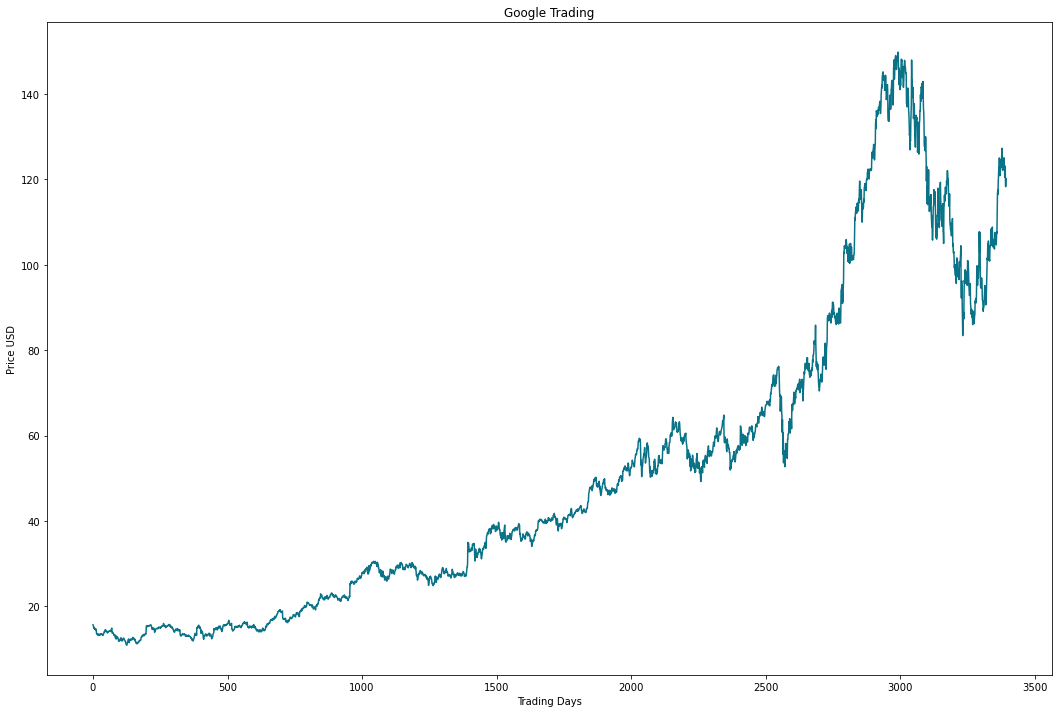

In [6]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [7]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.033652  0.034348  0.118092
1     1  0.033693  0.033850  0.189947
2     2  0.033457  0.031017  0.256697
3     3  0.030521  0.028466  0.423613
4     4  0.027417  0.029893  0.307795


Open   --- mean : 0.286537913613763   	 Std:  0.2617829185882343   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.28983757456438436   	 Std:  0.2644455623372131   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.08580214205140535   	 Std:  0.08392247415983405   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

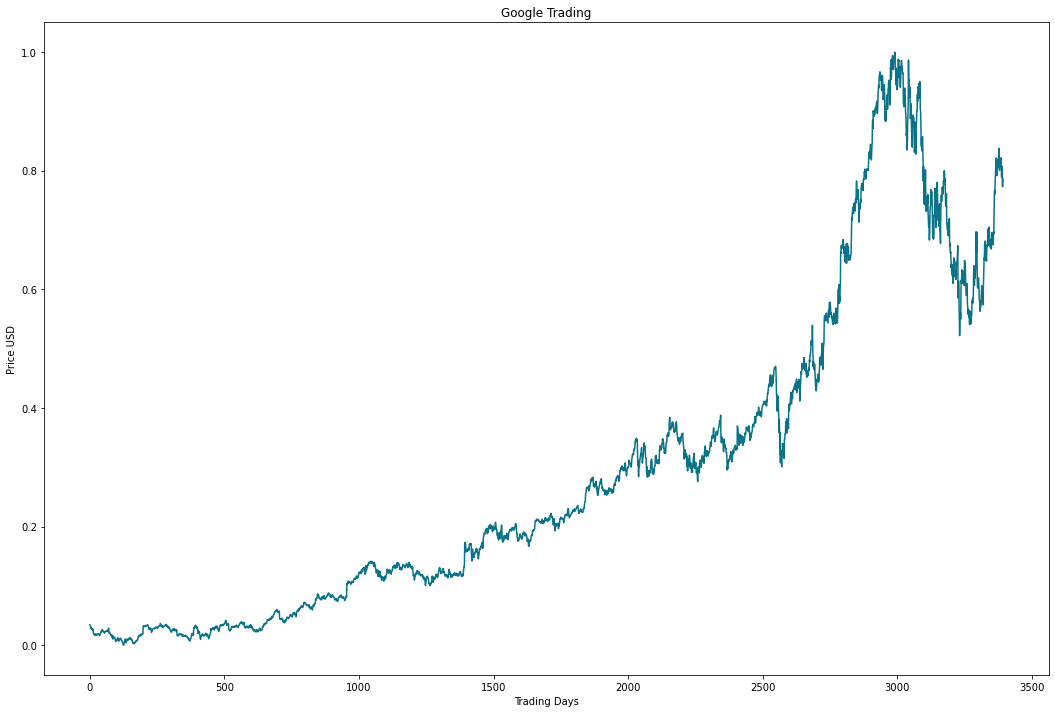

In [8]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [9]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [10]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.033652,0.034348,0.118092
1,1,0.033693,0.033850,0.189947
2,2,0.033457,0.031017,0.256697
3,3,0.030521,0.028466,0.423613
4,4,0.027417,0.029893,0.307795


**Step 2:** Split data into train and test pair

In [11]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2325, 1)
y_train (2325, 1)
x_test (1069, 1)
y_test (1069, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [12]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [13]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

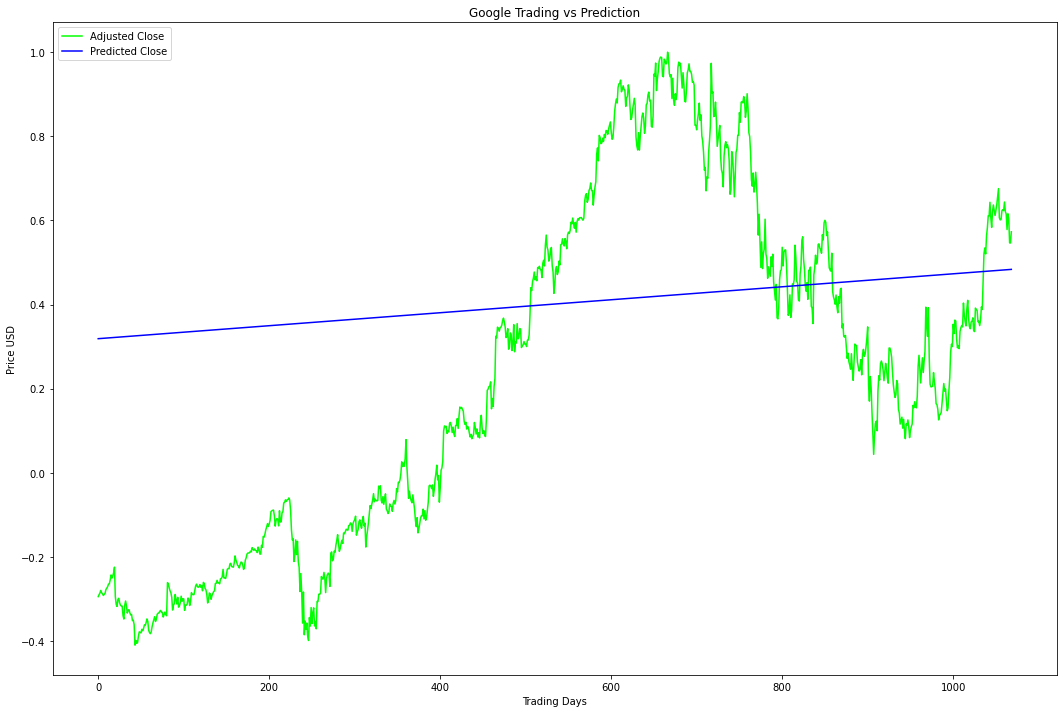

In [14]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [15]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.2032 MSE (0.4508 RMSE)
Test Score: 0.16822670 MSE (0.41015448 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [16]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

ModuleNotFoundError: No module named 'keras.layers.core'

**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [ ]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

**Step 3 :** Build a basic Long-Short Term Memory model

In [ ]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

**Step 4:** Train the model

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

**Step 5:** make prediction using test data

In [ ]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

In [ ]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [ ]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

**Step 2: ** Train improved LSTM model

In [ ]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

**Step 3:** Make prediction on improved LSTM model

In [ ]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

In [ ]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [ ]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))